In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


There are 19 rows and 846 coulumns with no missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


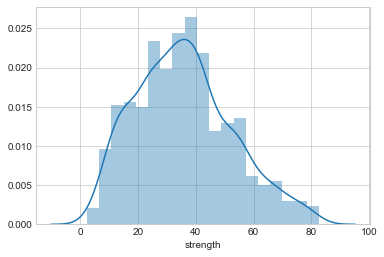

In [6]:
#Target variable
sns.distplot(df['strength'])

looks like there are outliers in age and superplastic columns

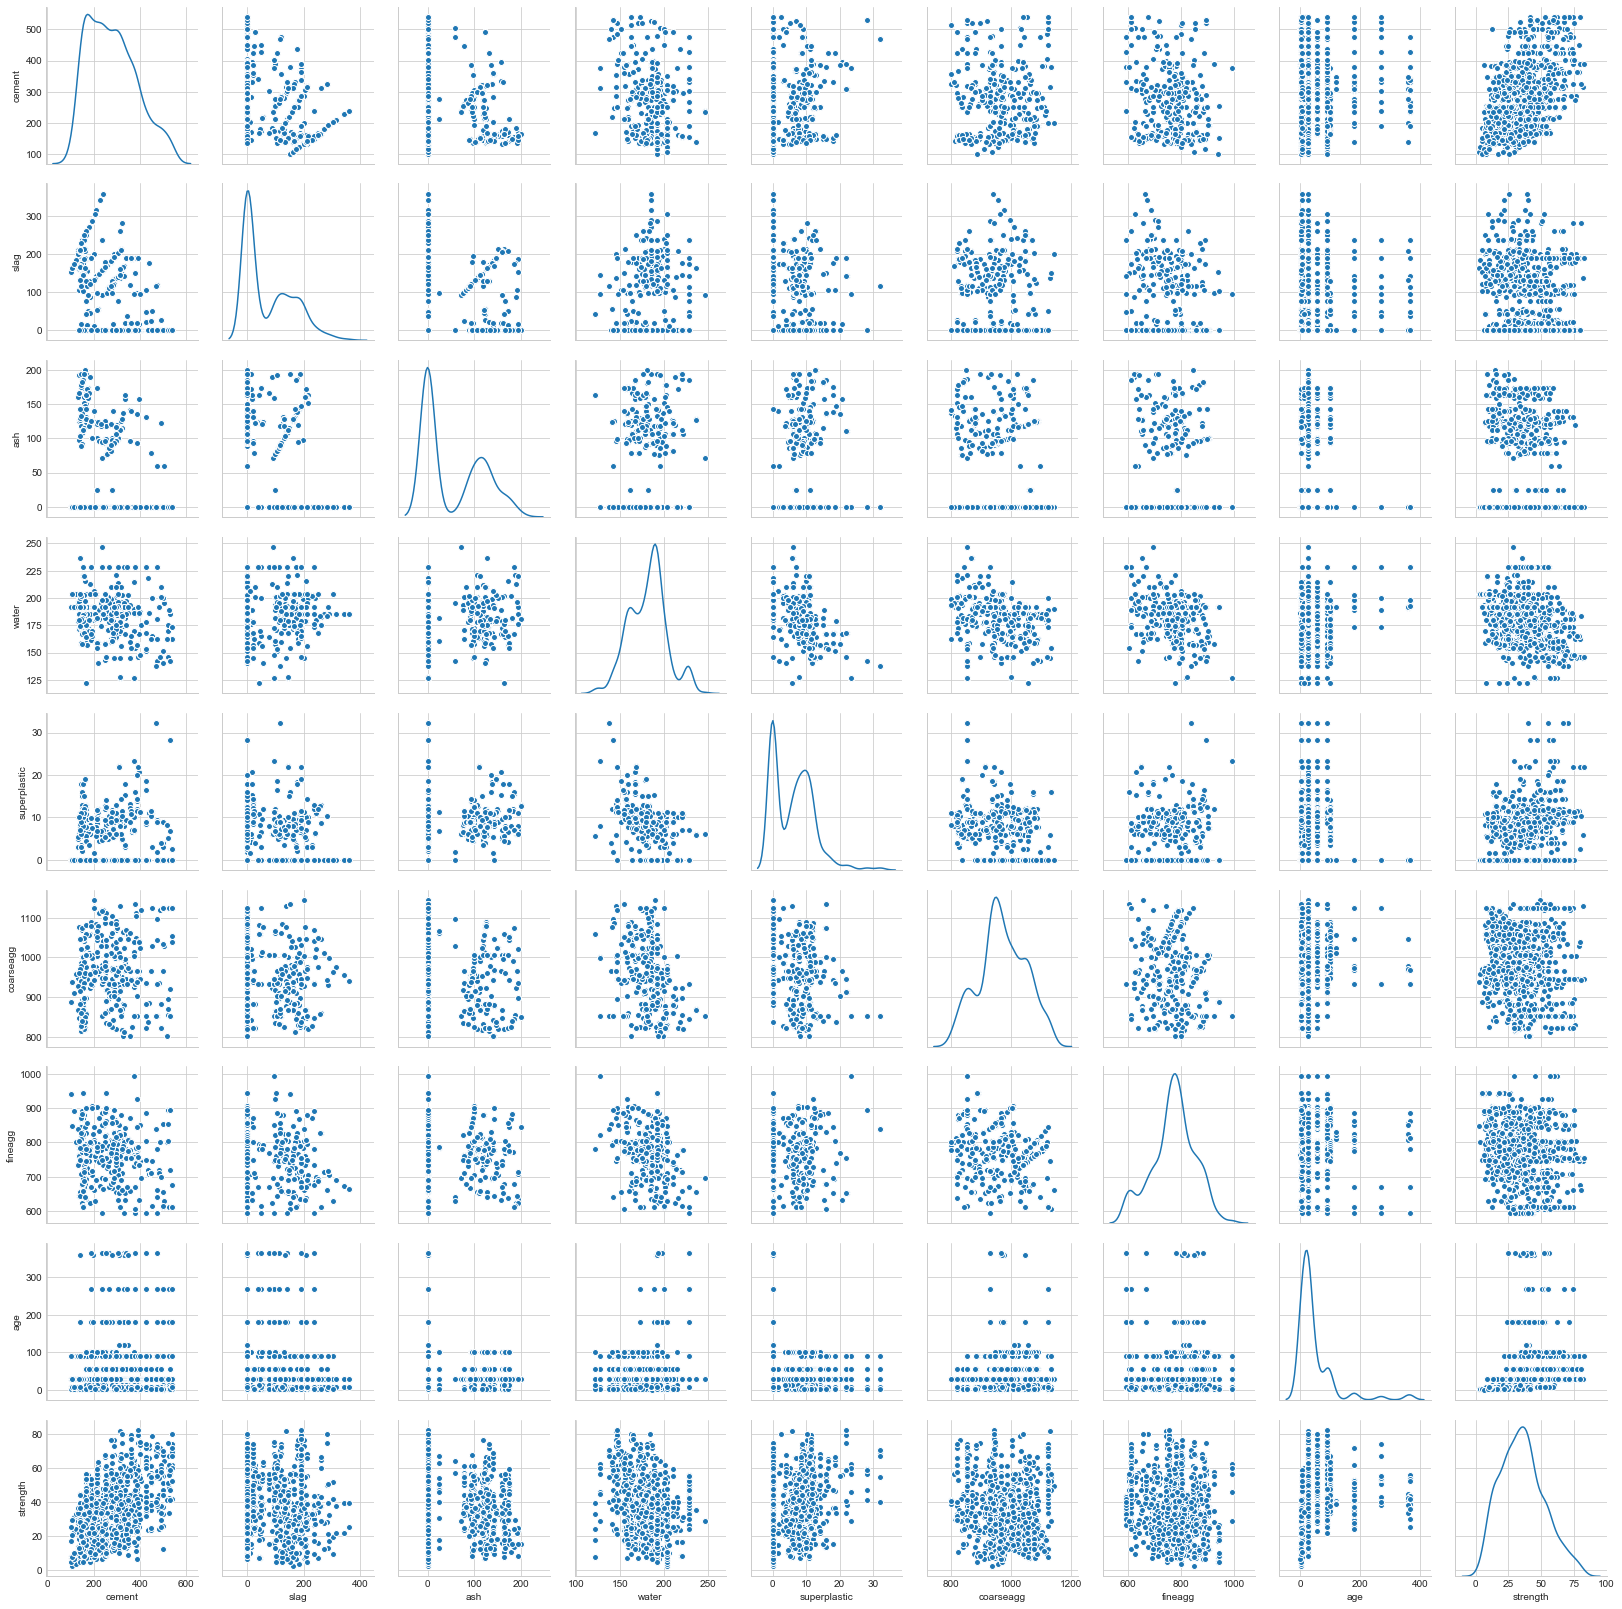

In [7]:
sns.pairplot(df, diag_kind = 'kde', palette='nipy_spectral')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15 )

plt.show()

All the variables are not much correlated with the target variable

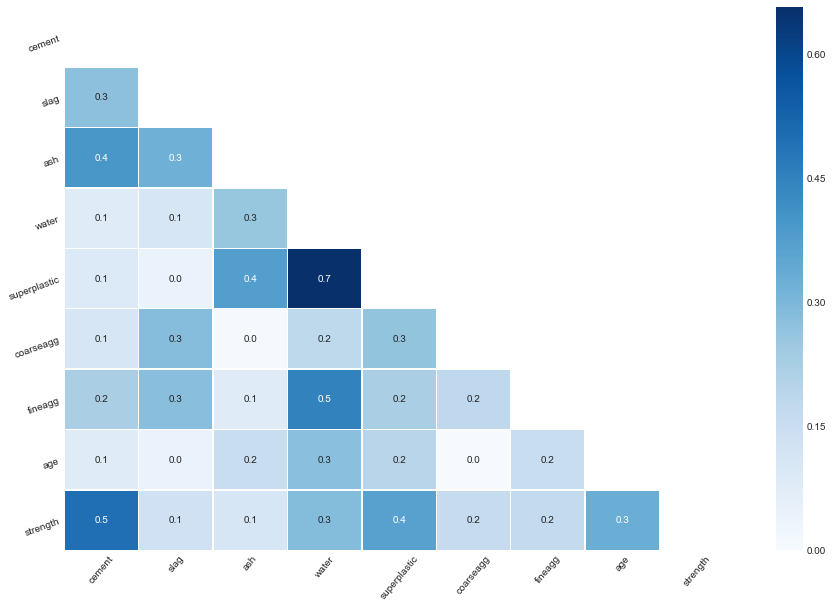

In [8]:
plt.figure(figsize=(15,10)) 

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

sns.heatmap(lower_triangle, annot=True, linewidths=.5, fmt= '.1f',cmap = 'Blues',mask = mask,xticklabels = corr.index, yticklabels = corr.columns)

plt.xticks(rotation = 50)
plt.yticks(rotation = 20) 
plt.show()

There are lot of outliers in age column

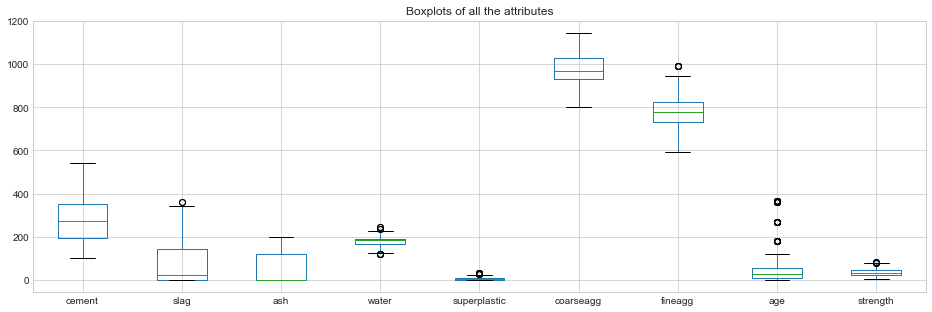

In [9]:
df.plot(kind = 'box',figsize=(16,5), title = 'Boxplots of all the attributes')

Outlier treatment

In [10]:
def impute_outliers(col):
    col_median = col.median()
    col_std  = col.std()
    
    return np.where((col - col_median).abs() > 2*col_std ,col_median,col)

In [11]:
#Only treating fineagg and age columns cuz they have significantly more outliers
df['fineagg'] = impute_outliers(df['fineagg'])

df['age'] = impute_outliers(df['age'])

Not removing any columns because from the heatmap we can see that there is atleast 10% correlation between the columns and the target column

In [12]:
from scipy.stats import zscore

In [13]:
df_scaled = df.apply(zscore)

In [14]:
x_scaled = df_scaled.drop('strength', axis=1)
# the dependent variable
y_scaled = df_scaled['strength']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
y_pred = regression_model.predict(X_test)

Linear regression has achieved a score of 84%

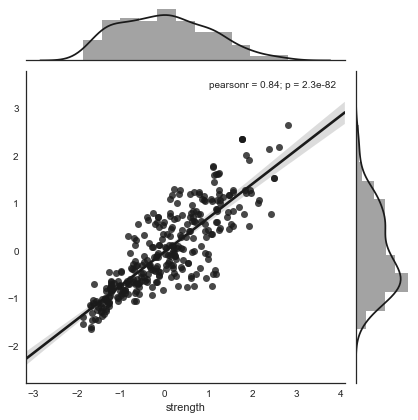

In [19]:
sns.set(style="darkgrid", color_codes=True)
           
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=y_pred, kind="reg", color="k");

SVM Model

In [20]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , Y_train)

SVR()

In [21]:
y_pred = clr.predict(X_test)

In [22]:
print(clr.score(X_train, Y_train))
print(clr.score(X_test, Y_test))

0.9061431761467889
0.867341157356508


SVM has achieved a 93% score 

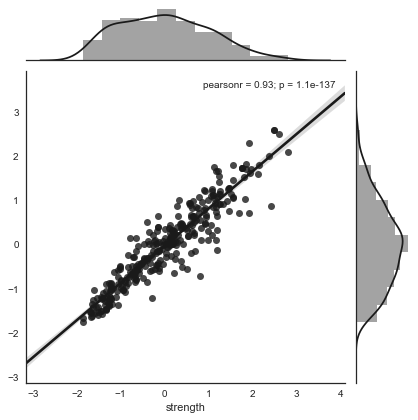

In [23]:
sns.set(style="darkgrid", color_codes=True)
           
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=y_pred, kind="reg", color="k");

From the pairplot it looks liek there are more than two gausians in the data

In [24]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 9 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,3.497191e+07,1
1,2.588166e+07,2
2,1.940026e+07,3
3,1.698211e+07,4
4,1.509472e+07,5
5,1.379297e+07,6
6,1.261827e+07,7
7,1.180354e+07,8


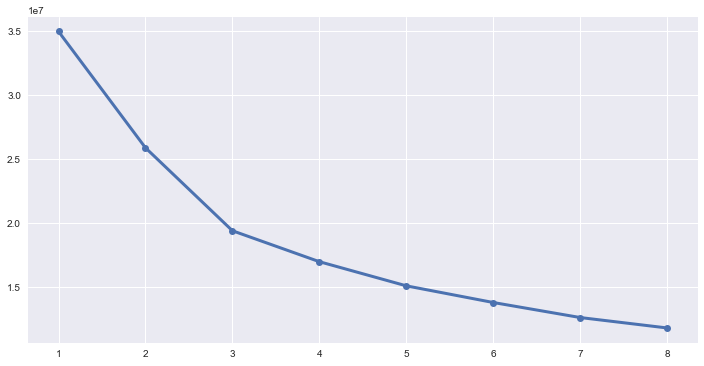

In [25]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o",linewidth = 3 )

In [26]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_scaled)
prediction=cluster.predict(df_scaled)

df_scaled["group"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_scaled_copy = df_scaled.copy(deep = True)

C:\Users\puneeth\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF7FB0AC50>,
      dtype=object)

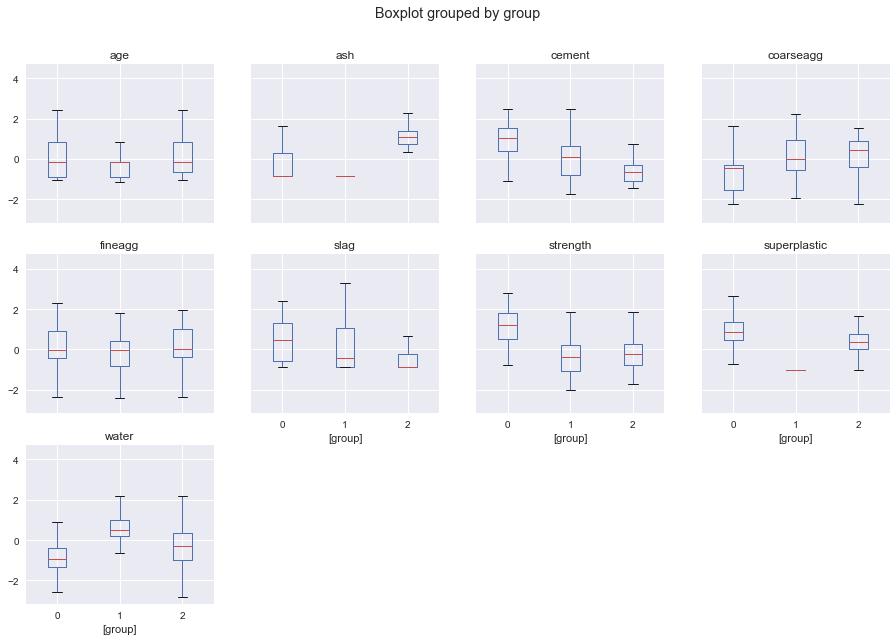

In [27]:
#checking for outliers
df_scaled.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

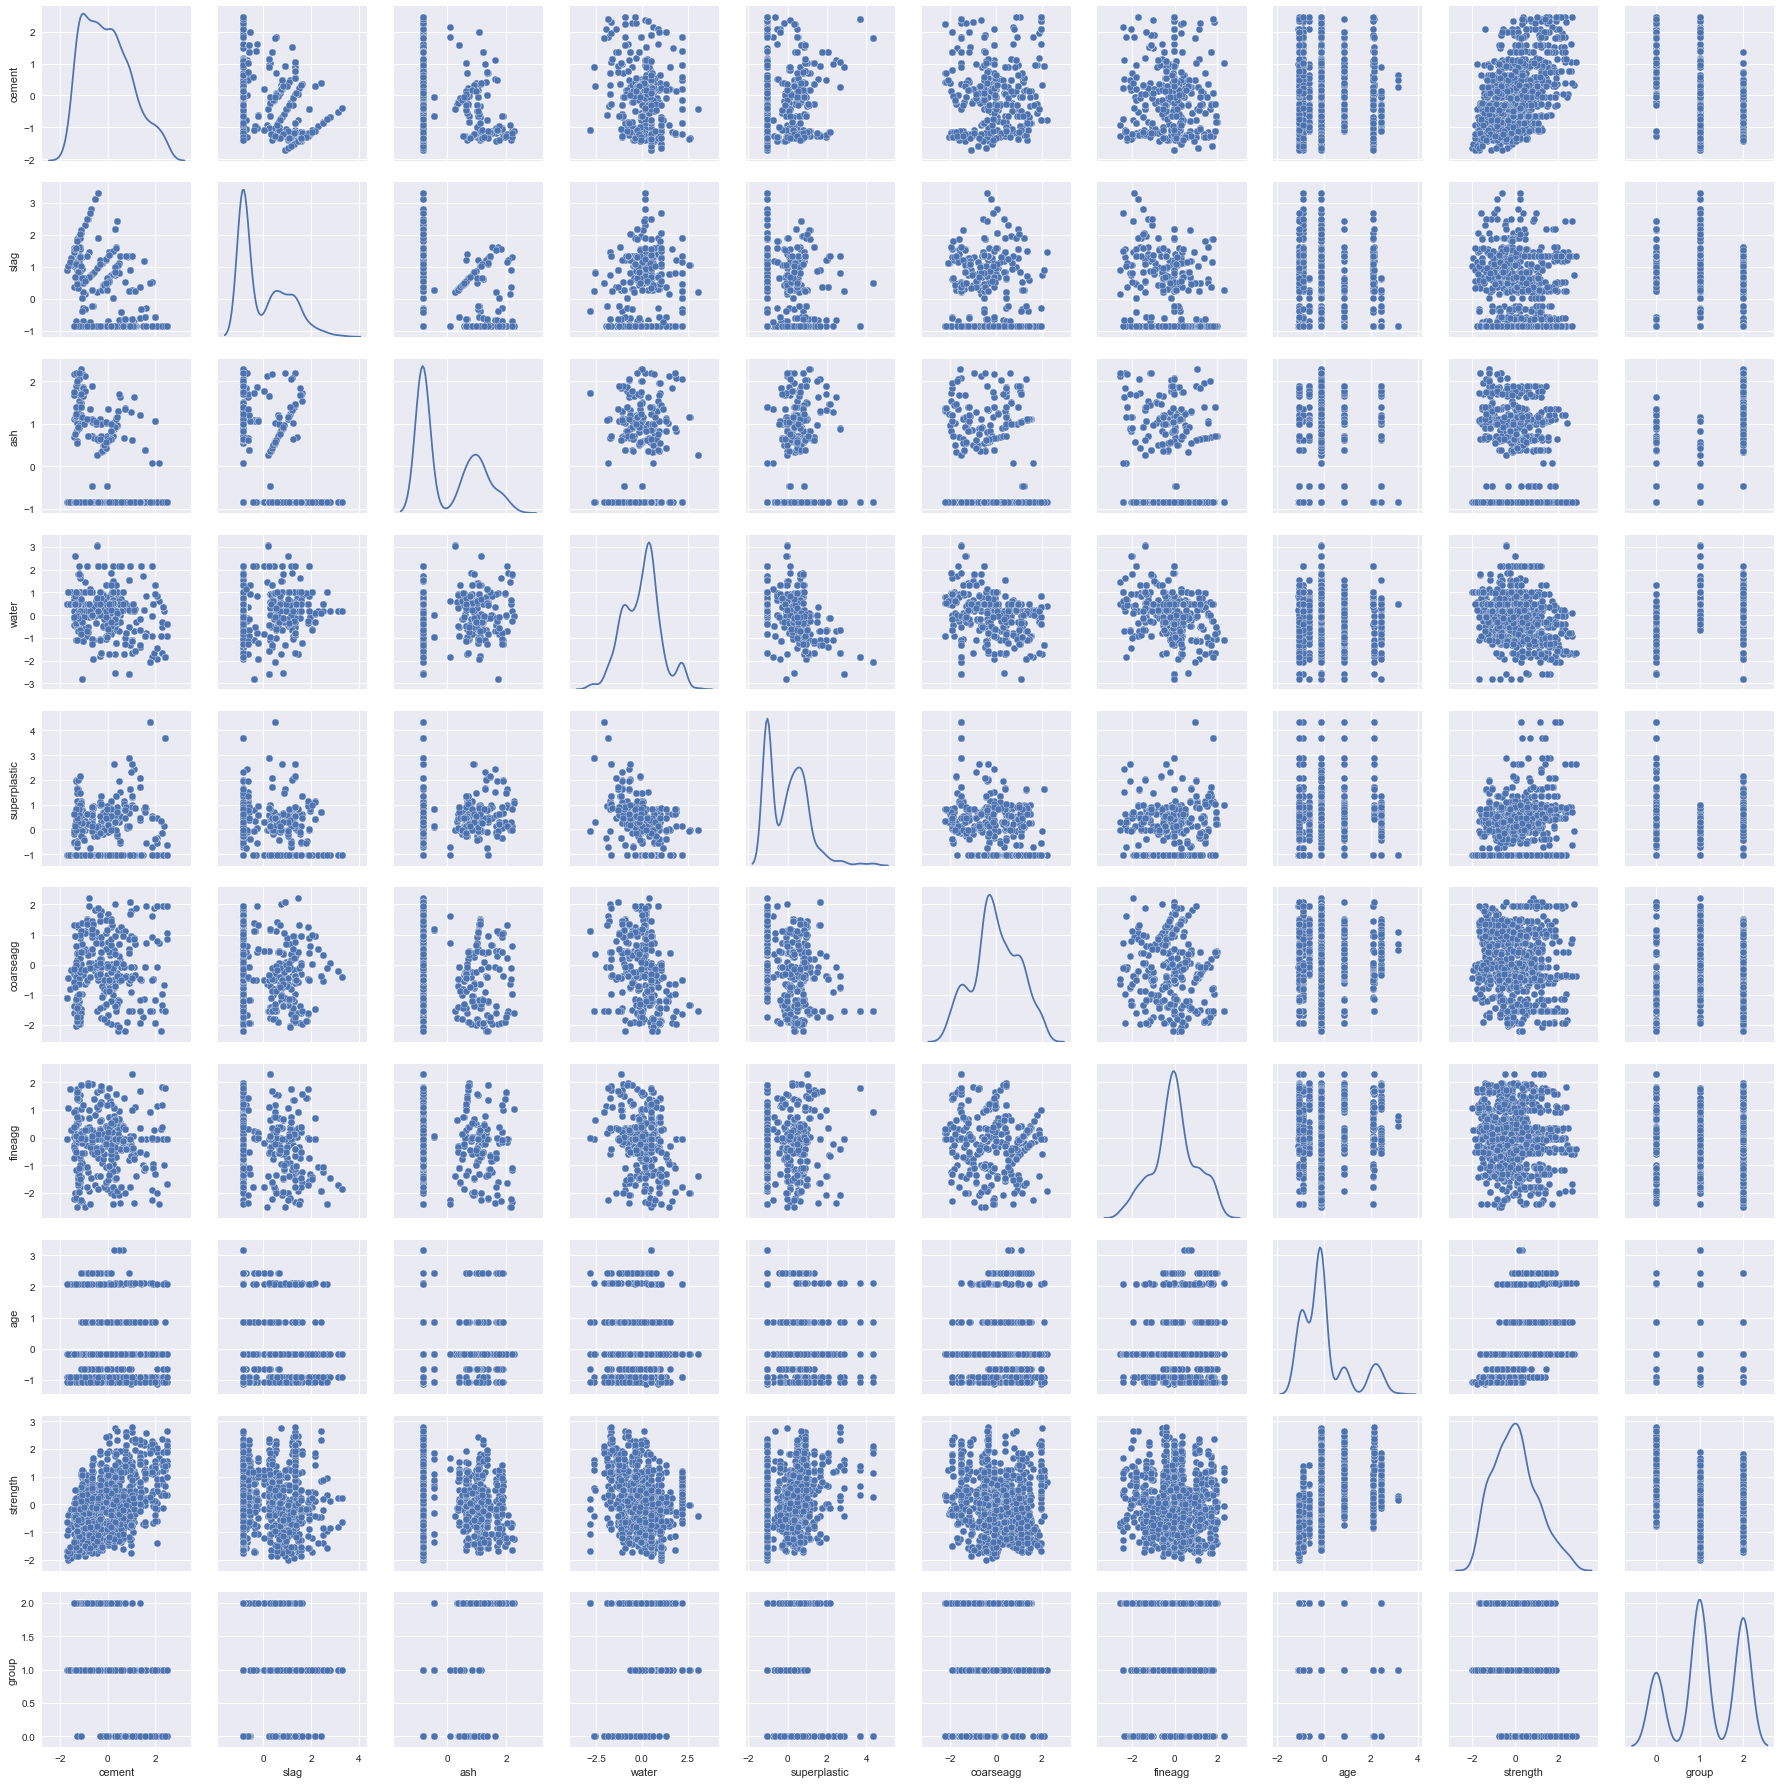

In [28]:
sns.pairplot(df_scaled, diag_kind='kde')

SVR with clusters

In [29]:
x = df_scaled.drop('strength', axis=1)
# the dependent variable
y = df_scaled['strength']

In [30]:
from sklearn import svm
clr = svm.SVR()  

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)
clr.fit(X_train , Y_train)
y_pred = clr.predict(X_test)

adding clusters is not improving the score

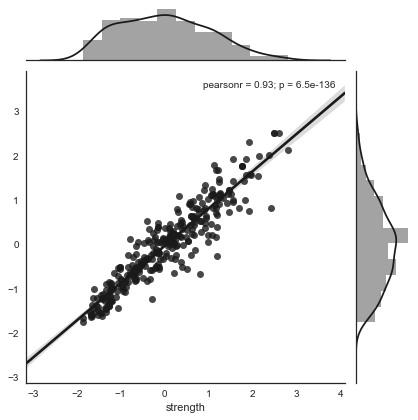

In [31]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=y_pred, kind="reg", color="k");

Decision tree regressor

In [32]:
df_scaled.pop('group')

x_scaled = df_scaled.drop('strength', axis=1)
# the dependent variable
y_scaled = df_scaled['strength']

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled ,y_scaled, test_size=0.30, random_state=1)

In [33]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3)

regressor.fit(X_train , Y_train)
feature_importances = regressor.feature_importances_

print(pd.DataFrame(feature_importances,index= x_scaled.columns,columns = ["Importance"]))


              Importance
cement          0.464058
slag            0.000000
ash             0.000000
water           0.088159
superplastic    0.000000
coarseagg       0.000000
fineagg         0.000000
age             0.447784


In [34]:
Y_pred = regressor.predict(X_test)

In [35]:
print(regressor.score(X_train, Y_train))
print(regressor.score(X_test, Y_test))

0.6358072763408258
0.5831041243290158


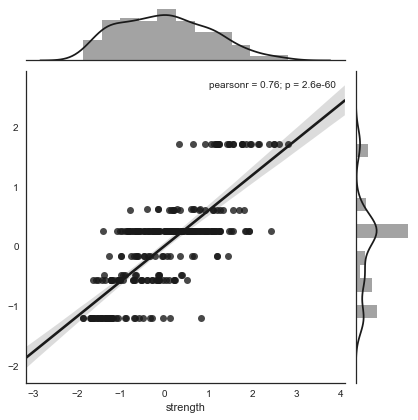

In [36]:
            
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=Y_pred, kind="reg", color="k");

Ridge Regressor

In [37]:
x = df.drop('strength', axis=1)
# the dependent variable
y = df['strength']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.3)
ridge.fit(X_train,Y_train)

Y_pred = ridge.predict(X_test)

In [39]:
print(ridge.score(X_train, Y_train))
print(ridge.score(X_test, Y_test))

0.7113702807743574
0.699967440464075


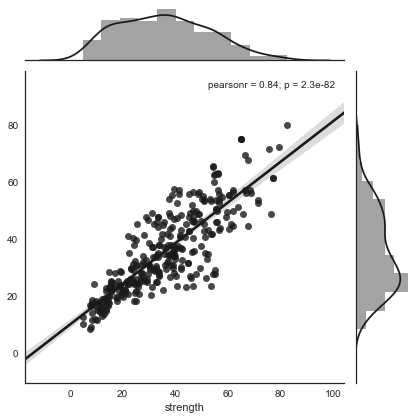

In [40]:
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=Y_pred, kind="reg", color="k");

Lasso Regressor

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.3)
lasso.fit(X_train,Y_train)

Y_pred = lasso.predict(X_test)

In [42]:
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.7113548204393896
0.6998398862851909


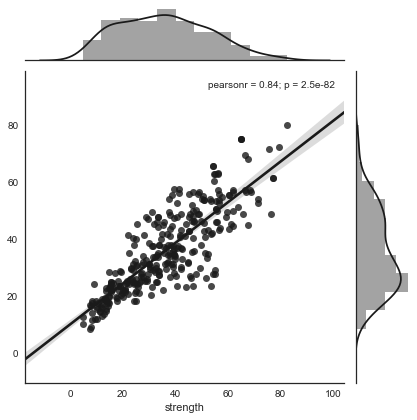

In [43]:
with sns.axes_style("white"):
    sns.jointplot(x=Y_test, y=Y_pred, kind="reg", color="k");

lets try to increase the complexity of the model to a higher degree

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [46]:
x_scaled = df_scaled.drop('strength', axis=1)
# the dependent variable
y_scaled = df_scaled['strength']

In [47]:
x_scaled = x.apply(zscore)

In [48]:
X_poly = poly.fit_transform(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)


In [49]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [50]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.7752896255776933
0.7638137501222922


In [51]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [52]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7751015954419758
0.7614953130572647


Support vector regressor turned out to be the best 

Linear regression - 0.84

Support vector regressor - 0.93

Decision tree regressor - 0.76

Ridge regressor - 0.84

Lasso regressor - 0.84

Final predictions(SVR)

In [53]:
df_scaled = df.apply(zscore)

x_scaled = df_scaled.drop('strength', axis=1)
# the dependent variable
y_scaled = df_scaled['strength']

In [57]:
from sklearn import svm
clr = svm.SVR()  

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error


kfold = KFold(n_splits=30)

results = cross_val_score(clr, x_scaled, y_scaled, cv=kfold)


In [77]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.85407354 0.69357352 0.91631062 0.82779039 0.81981785 0.86115666
 0.93891838 0.89184821 0.8929228  0.75070415 0.93921305 0.9301584
 0.94058546 0.90623548 0.7727478  0.90118462 0.87957764 0.916469
 0.86587546 0.94855466 0.85706229 0.88559178 0.8576169  0.86930631
 0.88249154 0.92527742 0.81780646 0.82943465 0.89831992 0.82947209]
Accuracy: 87.000% (5.832%)


we can say with 95% confidence that the model will perform within mean plus or minus two standard deviations.

Hence, we can say the model will perform between 88.664% and 75.336% with 95% confidence